<a href="https://colab.research.google.com/github/ZerXXX0/CV-hand-gesture-recognition-rock-paper-scissor/blob/main/Rock_Paper_Scissor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Welcome to the rock paper scissor hand gesture recognition project by ZerX**

There are a couple steps in order to be able to detect the hand gesture in an image using the model.


1.   Installing library
2.   Loading dataset from roboflow
3.   Training the model with yolov8
4.   And finally, detecting the gesture




Installing library

In [1]:
pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.0 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.8
    Uninstalling idna-3.8:
      Successfully uninstalled idna-3.8


In [2]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 872.1/872.1 kB 26.7 MB/s eta 0:00:00


Loading dataset

In [3]:
from roboflow import Roboflow

# Loading dataset from roboflow
rf = Roboflow(api_key="SJs4I0zmErRwcIho6No5")
project = rf.workspace("roboflow-58fyf").project("rock-paper-scissors-sxsw")
version = project.version(14)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.87, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to rock-paper-scissors-14 in yolov8:: 100%|██████████| 14682/14682 [00:03<00:00, 3909.32it/s]


Training the model

In [5]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolov8n.pt")

# Train the model
results = model.train(data="/content/rock-paper-scissors-14/data.yaml", epochs=7, imgsz=640)

Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/rock-paper-scissors-14/data.yaml, epochs=7, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

100%|██████████| 755k/755k [00:00<00:00, 41.3MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /content/rock-paper-scissors-14/train/labels... 6455 images, 2516 backgrounds, 0 corrupt: 100%|██████████| 6455/6455 [00:04<00:00, 1413.50it/s]


train: New cache created: /content/rock-paper-scissors-14/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/rock-paper-scissors-14/valid/labels... 576 images, 238 backgrounds, 0 corrupt: 100%|██████████| 576/576 [00:00<00:00, 1282.48it/s]

val: New cache created: /content/rock-paper-scissors-14/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train2
Starting training for 7 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/7       2.3G      1.276      2.963      1.445         10        640: 100%|██████████| 404/404 [02:30<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.22it/s]

                   all        576        400      0.479      0.451       0.45       0.27



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/7      2.23G      1.322       2.04      1.445          7        640: 100%|██████████| 404/404 [02:17<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  4.00it/s]

                   all        576        400      0.757      0.601      0.689      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/7      2.23G      1.295      1.705      1.424          6        640: 100%|██████████| 404/404 [02:15<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.86it/s]

                   all        576        400      0.757        0.7      0.778      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/7      2.23G      1.228      1.513       1.37         13        640: 100%|██████████| 404/404 [02:13<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:04<00:00,  3.89it/s]

                   all        576        400      0.745      0.756      0.808      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/7      2.23G      1.147      1.325      1.318          6        640: 100%|██████████| 404/404 [02:12<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.63it/s]

                   all        576        400      0.837        0.8      0.869      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        6/7      2.23G      1.046      1.115      1.257          9        640: 100%|██████████| 404/404 [02:09<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:06<00:00,  2.96it/s]

                   all        576        400       0.89      0.867      0.907      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        7/7      2.23G     0.9613     0.9654      1.207          6        640: 100%|██████████| 404/404 [02:16<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:05<00:00,  3.26it/s]

                   all        576        400      0.916      0.877       0.93      0.712



7 epochs completed in 0.279 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 6.2MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics YOLOv8.2.87 🚀 Python-3.10.12 torch-2.4.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 18/18 [00:07<00:00,  2.49it/s]


                   all        576        400      0.916      0.878       0.93      0.712
                 Paper        132        139      0.952      0.849      0.934      0.697
                  Rock        121        141      0.922      0.894      0.938      0.707
              Scissors        116        120      0.874      0.892      0.918      0.732
Speed: 0.3ms preprocess, 2.4ms inference, 0.0ms loss, 2.8ms postprocess per image
Results saved to runs/detect/train2


Analysis from the training

In [6]:
from IPython.display import Image

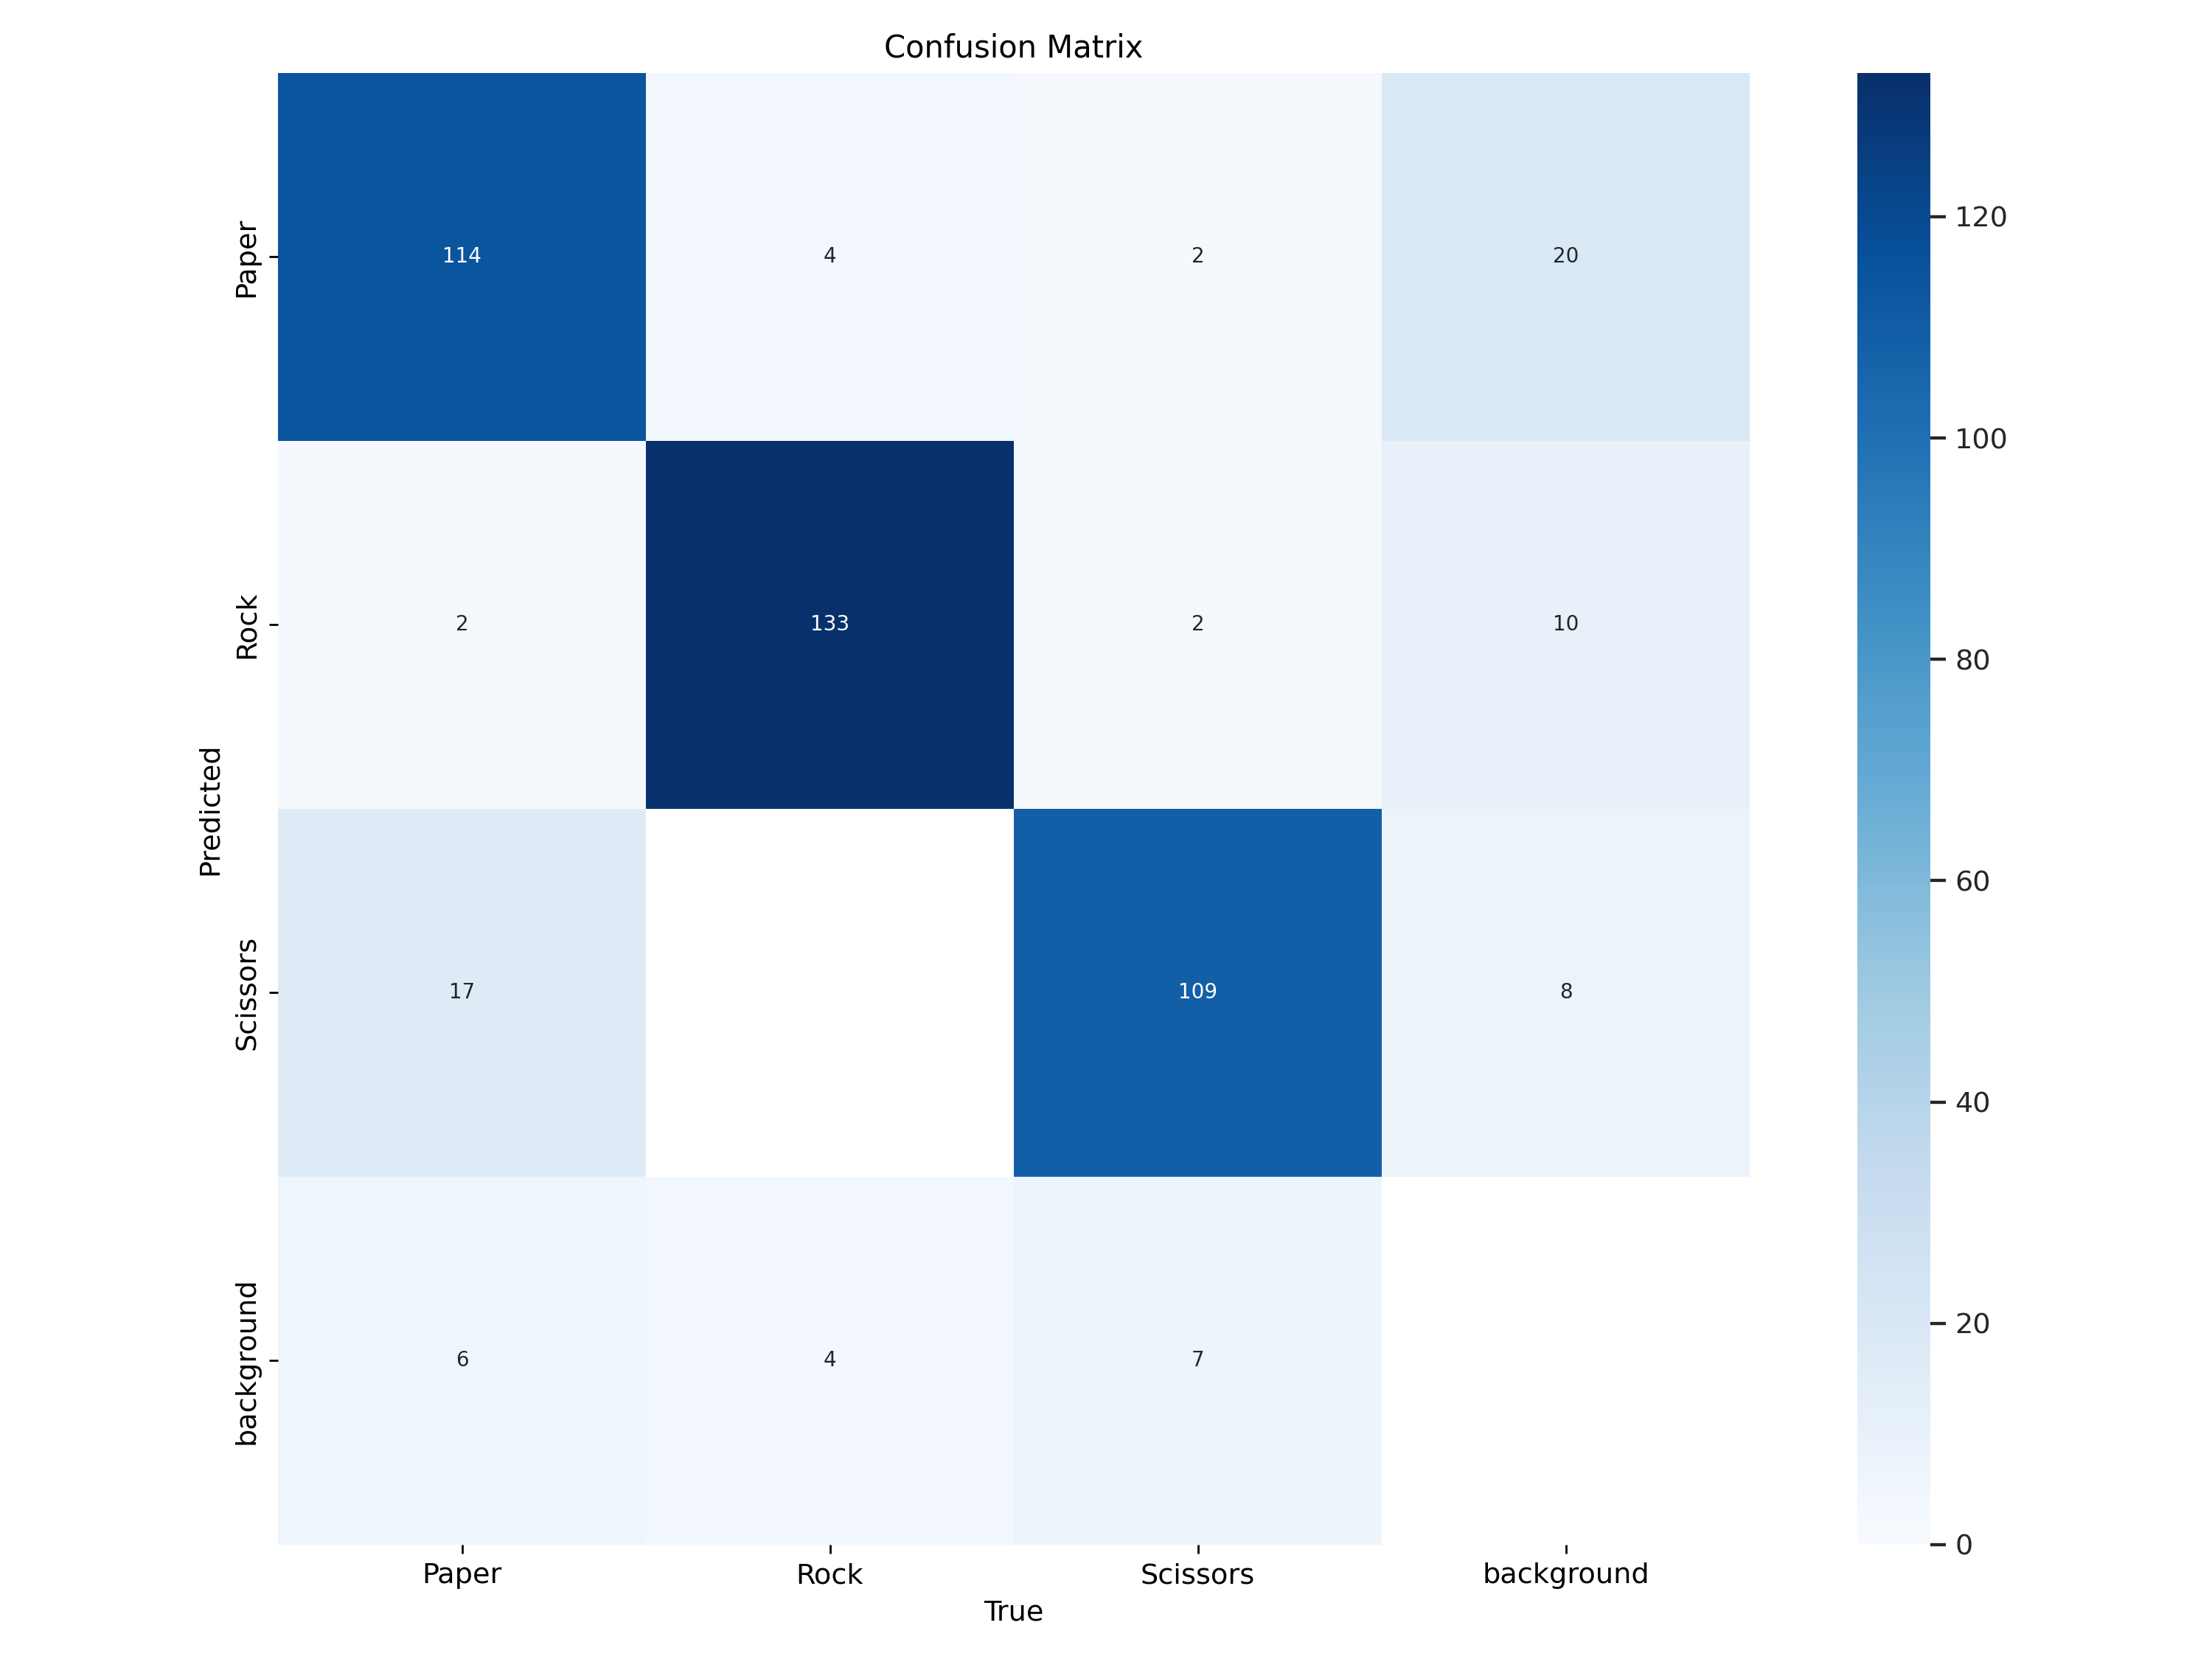

In [7]:
Image(filename='/content/runs/detect/train2/confusion_matrix.png', width=600)

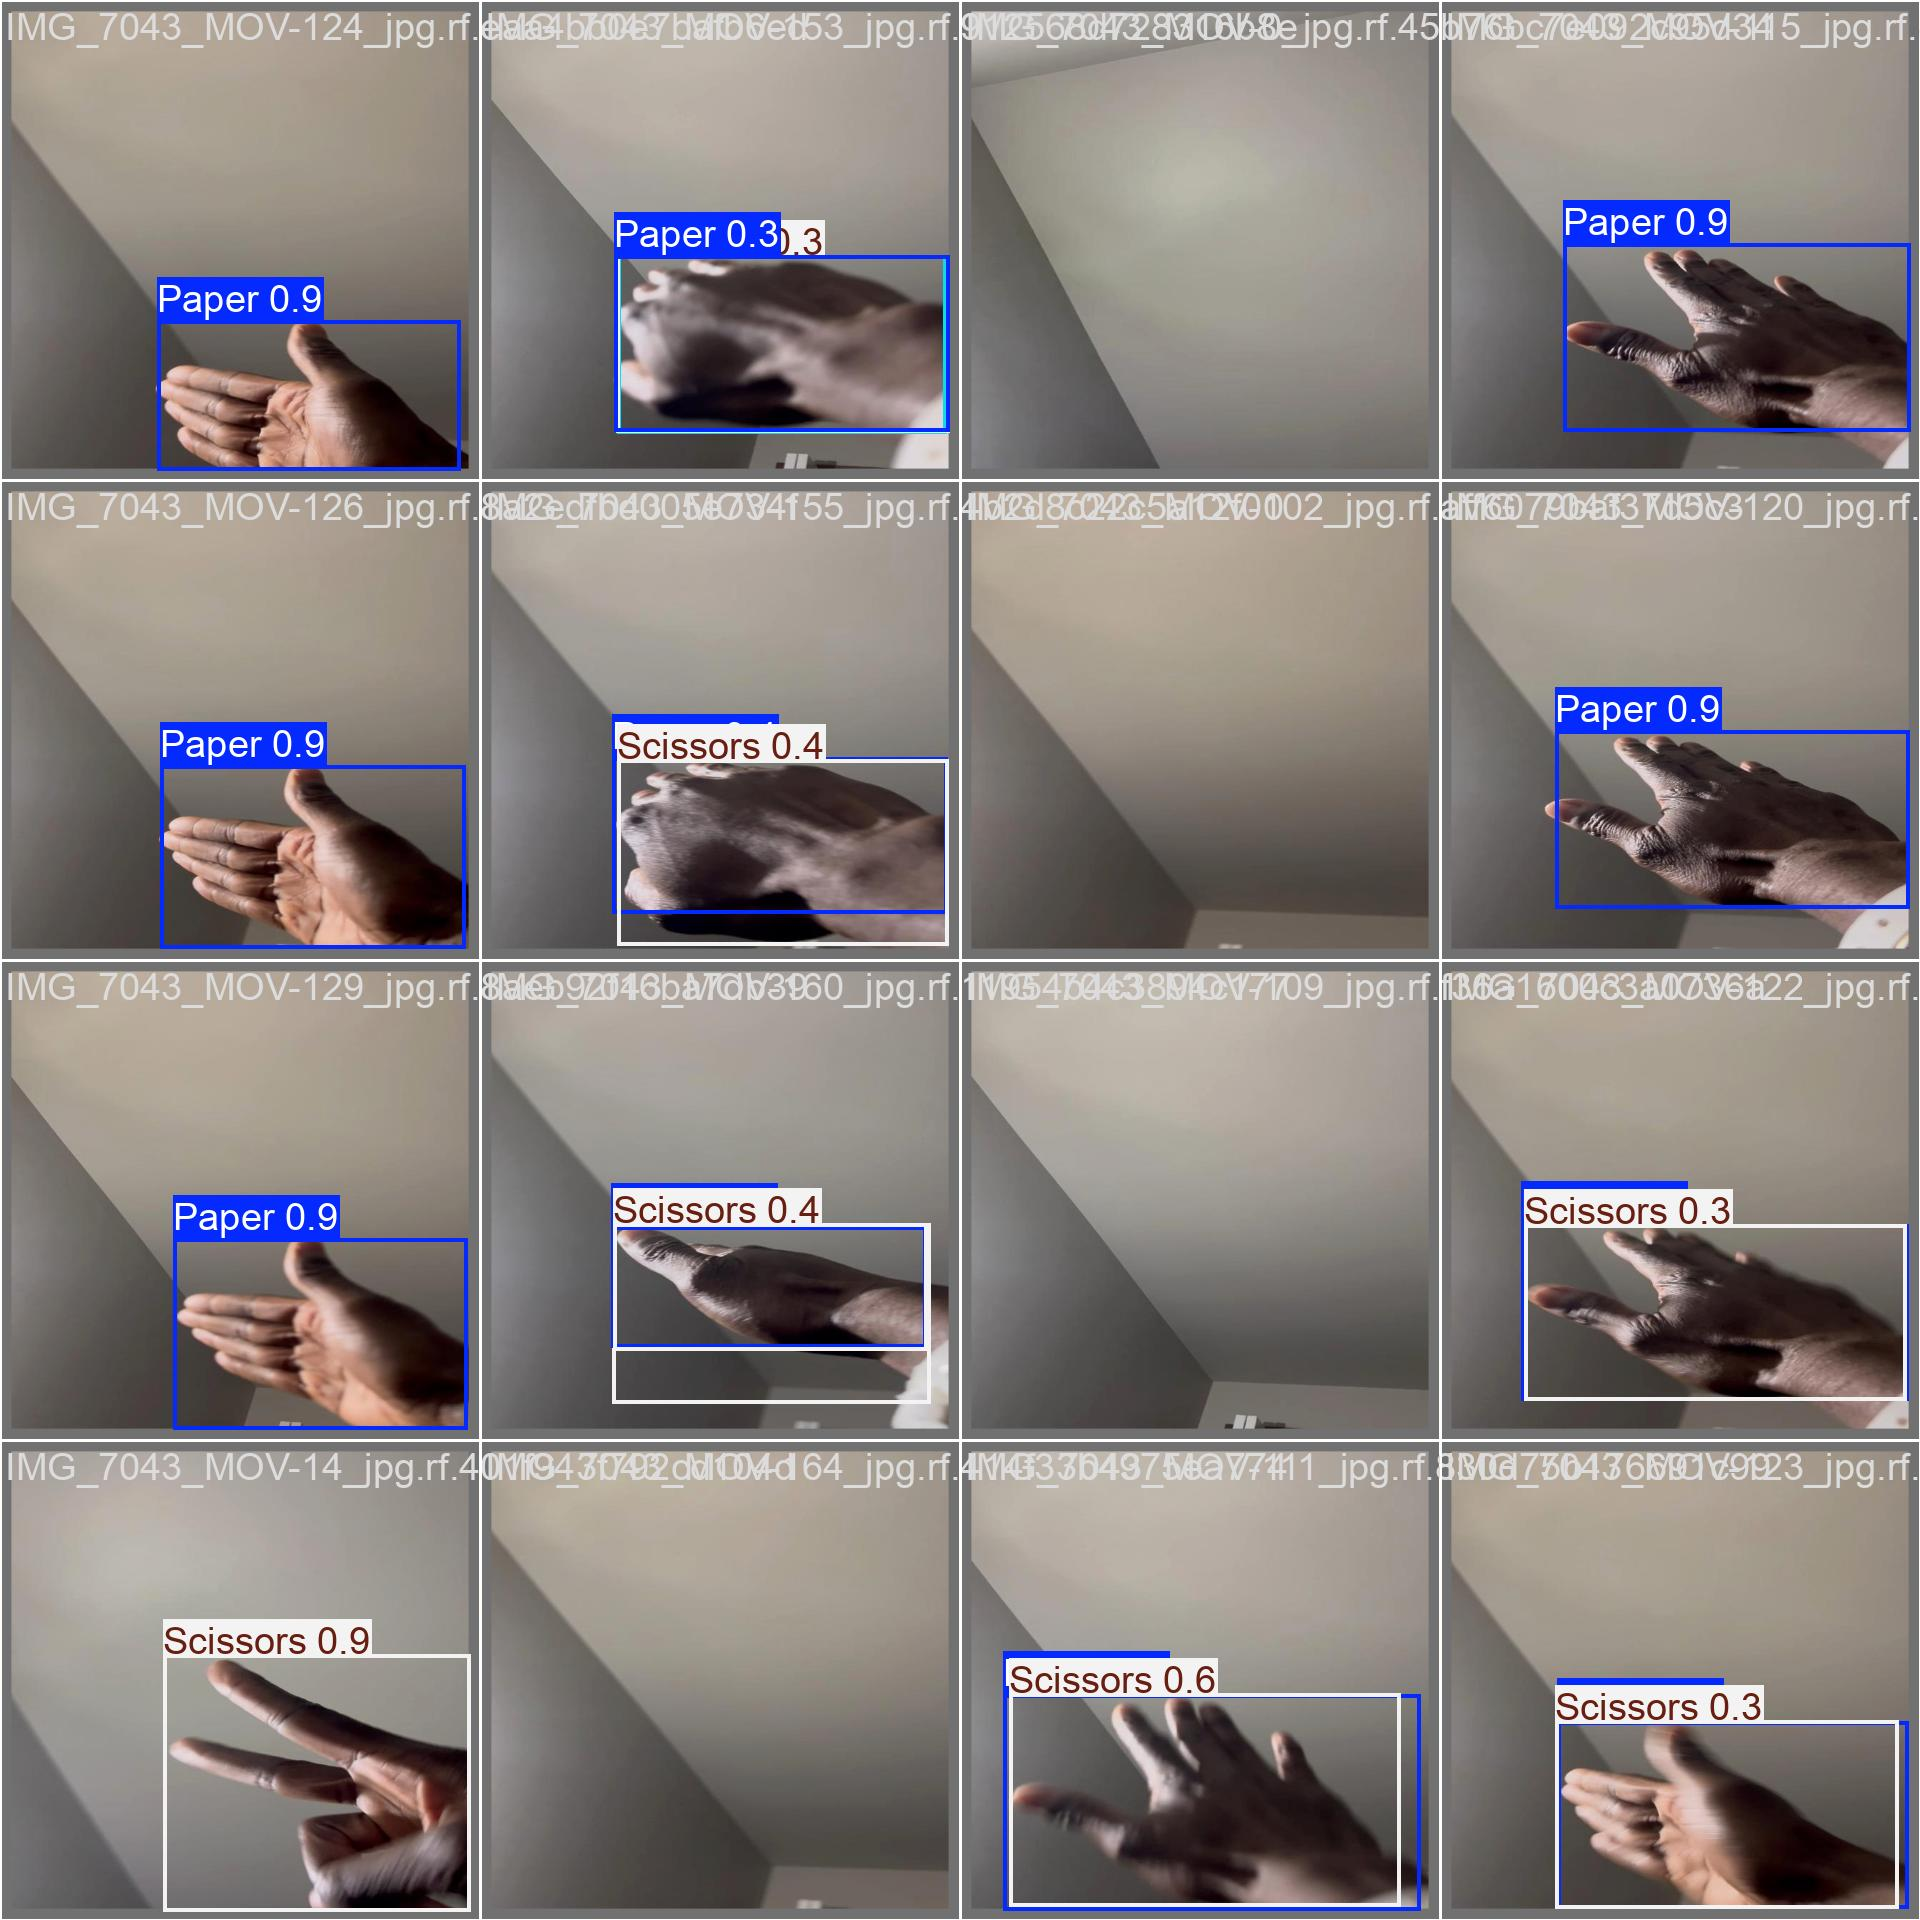

In [8]:
Image(filename='/content/runs/detect/train2/val_batch2_pred.jpg', width=600)

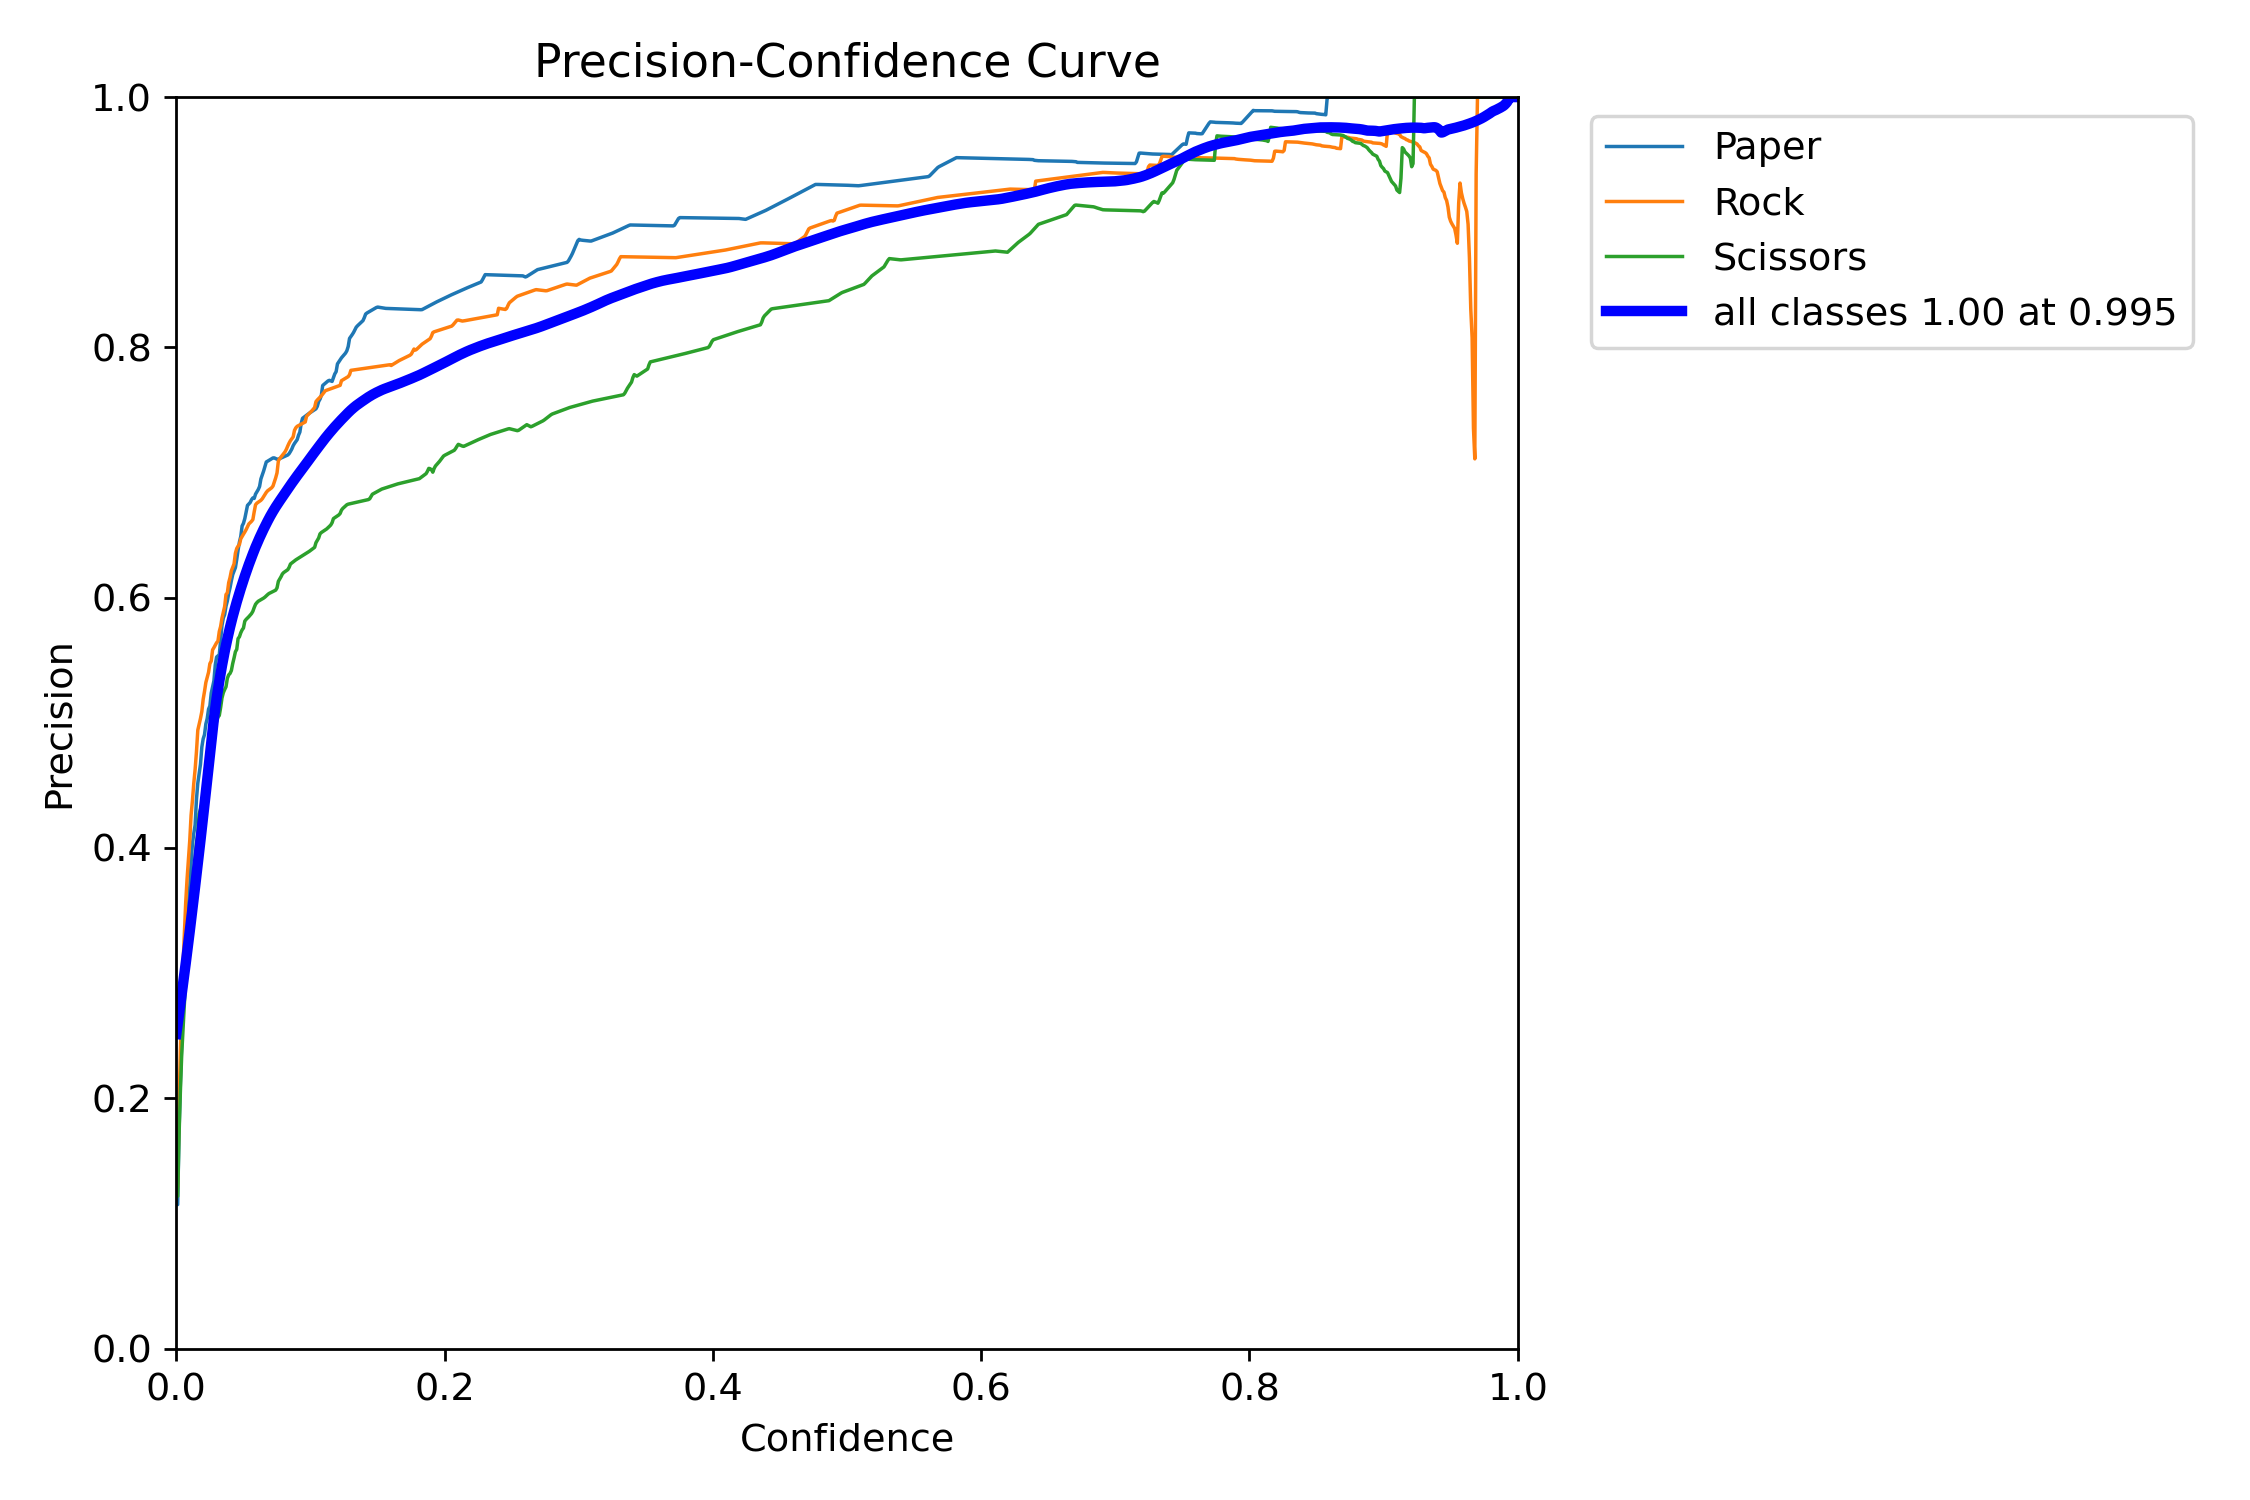

In [9]:
Image(filename='/content/runs/detect/train2/P_curve.png', width=600)

Image detection

In [32]:
from google.colab import files

# Upload an image and get the path
def get_path():
  uploaded = files.upload()
  for fn in uploaded.keys():
    return fn

path = "/content/" + get_path()

Saving Clapping-rock-paper-scissors.jpg to Clapping-rock-paper-scissors (1).jpg


In [34]:
from ultralytics import YOLO

# Load a model
model = YOLO('/content/runs/detect/train2/weights/best.pt')

# Run on an image
results = model.predict(source=path, conf=0.75, line_width=3, save=True)


image 1/1 /content/Clapping-rock-paper-scissors (1).jpg: 448x640 1 Rock, 1 Scissors, 10.0ms
Speed: 2.8ms preprocess, 10.0ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict5


In [35]:
# Name of the image
result_saved = "runs/detect/predict5/" + path.split("/")[-1]

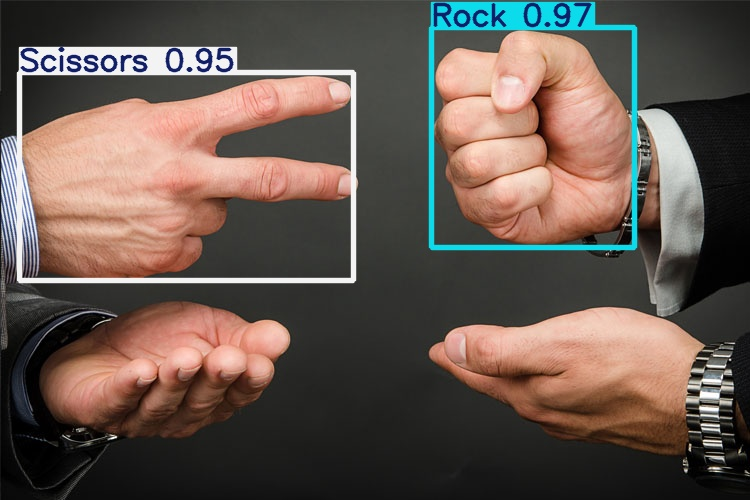

In [36]:
# Show the result
Image(filename=result_saved, width=600)

As you can see, the model can identify the gesture in the image. We can also use webcam as a source instead of a file, however since google colab doesn't support webcam directly, I'm not going to use it. We can still use it in local environment by modifying the code a bit.